# Titanic_Implement ml algorithms
## Data pre-processing

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [399]:
titanic = pd.read_csv('/kaggle/input/1-titanic-dataset/TitanicData1.csv')

In [400]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [401]:
print(titanic.shape)

(891, 12)


In [402]:
print(titanic.head(10))

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1 

In [403]:
print(titanic.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object


In [404]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [405]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [406]:
age_null = titanic[titanic['Age'].isnull()]
print(age_null)

     PassengerId  Pclass                                      Name     Sex  \
5              6       3                          Moran, Mr. James    male   
17            18       2              Williams, Mr. Charles Eugene    male   
19            20       3                   Masselmani, Mrs. Fatima  female   
26            27       3                   Emir, Mr. Farred Chehab    male   
28            29       3             O'Dwyer, Miss. Ellen "Nellie"  female   
..           ...     ...                                       ...     ...   
859          860       3                          Razi, Mr. Raihed    male   
863          864       3         Sage, Miss. Dorothy Edith "Dolly"  female   
868          869       3               van Melkebeke, Mr. Philemon    male   
878          879       3                        Laleff, Mr. Kristo    male   
888          889       3  Johnston, Miss. Catherine Helen "Carrie"  female   

     Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Sur

In [407]:
Embarked_null = titanic[titanic['Embarked'].isnull()]
print(Embarked_null)

     PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Survived  
61   38.0      0      0  113572  80.0   B28      NaN         1  
829  62.0      0      0  113572  80.0   B28      NaN         1  


In [408]:
#replace the null values of age with the median
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

/tmp/ipykernel_24/2832417716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


In [409]:
titanic.Age.isnull().sum()

0

In [410]:
most_frequent_embarked = titanic['Embarked'].mode()[0]
# Replace missing values with the most frequent value
titanic['Embarked'].fillna(most_frequent_embarked, inplace=True)

/tmp/ipykernel_24/300715510.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [411]:
titanic.Embarked.isnull().sum()

0

## Correlation Heatmap

In [412]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

#Transform the "Embarked" column to numerical values
titanic["Embarked_numeric"] = titanic["Embarked"].map(embarked_mapping)
print(titanic["Embarked_numeric"])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked_numeric, Length: 891, dtype: int64


In [413]:
gender_mapping = {"male": 0, "female": 1}

#Transform the "Sex" column to numerical values
titanic["Gender_numeric"] = titanic["Sex"].map(gender_mapping)
print(titanic["Gender_numeric"])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender_numeric, Length: 891, dtype: int64


In [414]:
#build correlation between the numerical values 
corr_titanic = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric', 'Gender_numeric','Survived']].corr()

<Axes: >

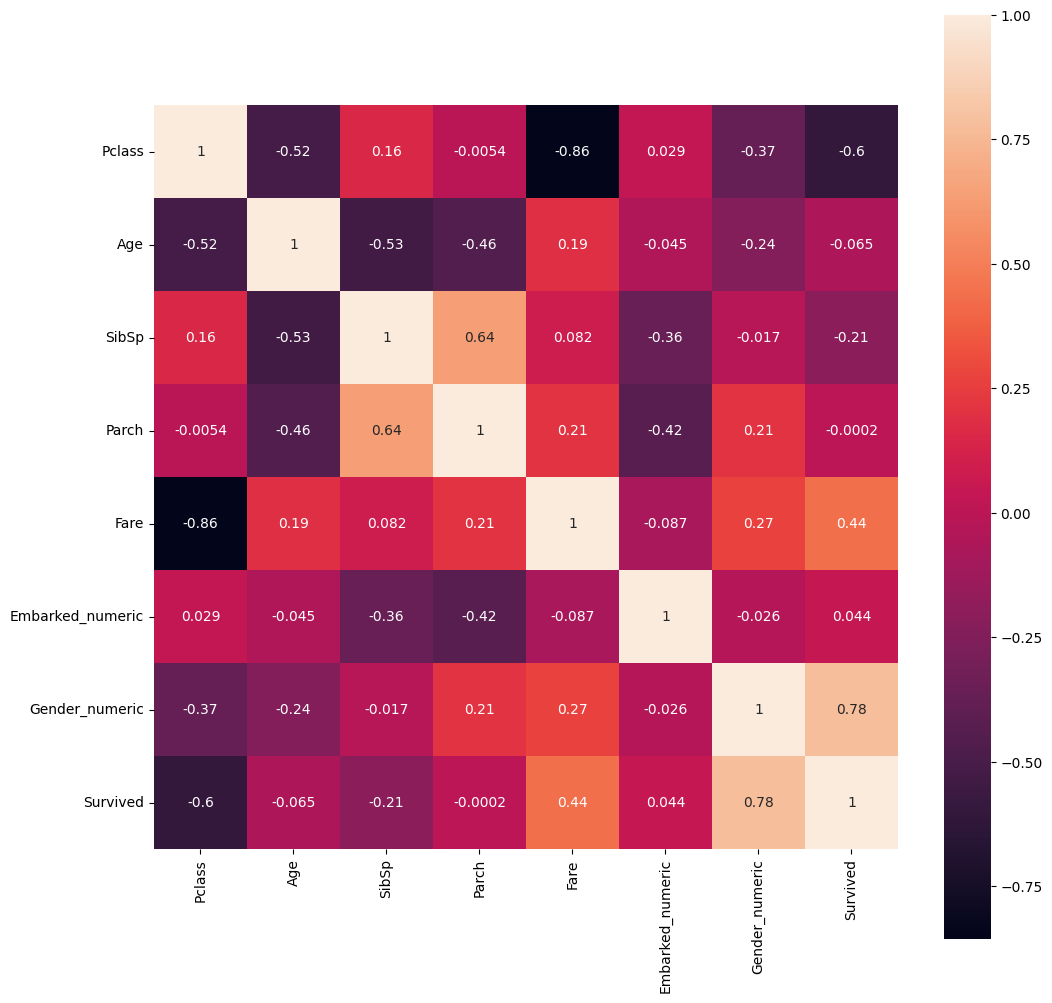

In [415]:
fig = plt.figure(figsize=(12,12))
numerical_titanic = corr_titanic.select_dtypes(include=np.number)
sns.heatmap(numerical_titanic.corr(),vmax=1,square=True,annot=True)

## Prediction Model

In [416]:
!pip install pyspark==3.2

In [417]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("ml").getOrCreate()
sc = spark.sparkContext

In [418]:
titanic1 = spark.read.csv("/kaggle/input/1-titanic-dataset/TitanicData1.csv",inferSchema=True, header = True)

In [419]:
titanic1.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|null|    0|    0|          33087

In [420]:
age_null_1 = titanic1.filter(titanic1.Age.isNull())
age_null_1.count()

177

In [421]:
Embarked_null_1 = titanic1.filter(titanic1.Embarked.isNull())
Embarked_null_1.count()

2

In [422]:
Cabin_null_1 = titanic1.filter(titanic1.Cabin.isNull())
Cabin_null_1.count()

687

In [423]:
#replacing nulls in age colum with median value
median_age = titanic1.approxQuantile("Age", [0.5], 0.01)[0]
titanic1 = titanic1.fillna({"Age": median_age})
titanic1.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|28.0|    0|    0|          33087

In [424]:
check_age = titanic1.filter(titanic1.Age.isNull())
check_age.count()

0

In [425]:
Freq_embarked = titanic1.groupBy("Embarked").count().sort("count", ascending=False).first()["Embarked"]
titanic1 = titanic1.fillna({"Embarked": Freq_embarked})
titanic1.show(truncate=False)

+-----------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|Survived|
+-----------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|1          |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |0       |
|2          |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |1       |
|3          |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |1       |
|4          |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)           |female|35.0|1    |0    |

In [426]:
check_embarked = titanic1.filter(titanic1.Embarked.isNull())
check_embarked.count()

0

In [427]:
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [428]:
gender_to_num = StringIndexer(inputCol="Sex", outputCol="Gender")

In [429]:
#retreiving the numerical classification
Gender_numeric = gender_to_num.fit(titanic1).transform(titanic1)
Gender_numeric.select("Sex", "Gender").distinct().show()

+------+------+
|   Sex|Gender|
+------+------+
|  male|   0.0|
|female|   1.0|
+------+------+



In [430]:
embarked_to_num = StringIndexer(inputCol="Embarked", outputCol="Port")

In [431]:
#retreiving the numerical classification
Embarked_numeric = embarked_to_num.fit(titanic1).transform(titanic1)
Embarked_numeric.select("Embarked", "Port").distinct().show()

+--------+----+
|Embarked|Port|
+--------+----+
|       Q| 2.0|
|       S| 0.0|
|       C| 1.0|
+--------+----+



In [432]:
Assembler_features = VectorAssembler(inputCols=['Gender', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Port'],outputCol="features")

In [433]:
from pyspark.ml import Pipeline
data_prep_pipe = Pipeline(stages=[gender_to_num, embarked_to_num, Assembler_features])

In [434]:
cleaner = data_prep_pipe.fit(titanic1)
clean_data = cleaner.transform(titanic1)
clean_data = clean_data.select(['features', 'Survived'])
clean_data.show(truncate=False)

+----------------------------------+--------+
|features                          |Survived|
+----------------------------------+--------+
|[0.0,3.0,22.0,1.0,0.0,7.25,0.0]   |0       |
|[1.0,1.0,38.0,1.0,0.0,71.2833,1.0]|1       |
|[1.0,3.0,26.0,0.0,0.0,7.925,0.0]  |1       |
|[1.0,1.0,35.0,1.0,0.0,53.1,0.0]   |1       |
|(7,[1,2,5],[3.0,35.0,8.05])       |0       |
|[0.0,3.0,28.0,0.0,0.0,8.4583,2.0] |0       |
|(7,[1,2,5],[1.0,54.0,51.8625])    |0       |
|[0.0,3.0,2.0,3.0,1.0,21.075,0.0]  |0       |
|[1.0,3.0,27.0,0.0,2.0,11.1333,0.0]|1       |
|[1.0,2.0,14.0,1.0,0.0,30.0708,1.0]|1       |
|[1.0,3.0,4.0,1.0,1.0,16.7,0.0]    |1       |
|[1.0,1.0,58.0,0.0,0.0,26.55,0.0]  |1       |
|(7,[1,2,5],[3.0,20.0,8.05])       |0       |
|[0.0,3.0,39.0,1.0,5.0,31.275,0.0] |0       |
|[1.0,3.0,14.0,0.0,0.0,7.8542,0.0] |0       |
|[1.0,2.0,55.0,0.0,0.0,16.0,0.0]   |1       |
|[0.0,3.0,2.0,4.0,1.0,29.125,2.0]  |0       |
|(7,[1,2,5],[2.0,28.0,13.0])       |1       |
|[1.0,3.0,31.0,1.0,0.0,18.0,0.0]  

## Naive Bayes

In [435]:
# Split the data into training and test sets (70/30%)
(training,testing) = clean_data.randomSplit([0.7,0.3],seed=891)

In [436]:
survival_count = training.groupBy("Survived").count()

# Show the result
survival_count.show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  244|
|       0|  382|
+--------+-----+



In [437]:
# import machine learning classifier
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes(featuresCol="features", labelCol="Survived")
# Train Naive bayes model using training data
#fit responsible to create model
survival_predictor_nb = NB.fit(training)

In [438]:
# Test the model on testing data
#evaluating/seeing how precise is the model
test_results_nb = survival_predictor_nb.transform(testing)
test_results_nb.show(truncate=False)

+------------------------------+--------+-----------------------------------------+------------------------------------------+----------+
|features                      |Survived|rawPrediction                            |probability                               |prediction|
+------------------------------+--------+-----------------------------------------+------------------------------------------+----------+
|(7,[1,2],[1.0,28.0])          |0       |[-21.139162023777853,-33.44930906294602] |[0.9999954942290296,4.505770970368946E-6] |0.0       |
|(7,[1,2],[1.0,38.0])          |0       |[-27.39608913669141,-43.747105379482534] |[0.9999999207783584,7.922164167246245E-8] |0.0       |
|(7,[1,2],[1.0,39.0])          |0       |[-28.021781847982762,-44.77688501113619] |[0.9999999471127324,5.288726755251928E-8] |0.0       |
|(7,[1,2],[2.0,28.0])          |0       |[-24.2644229541102,-37.12350648366632]   |[0.9999973976251655,2.602374834530939E-6] |0.0       |
|(7,[1,2],[2.0,28.0])          |0 

In [439]:
# extract prediction and ground truth label from test_results
PredictionAndSurvived_nb = test_results_nb['Survived','prediction']
PredictionAndSurvived_nb.show()

+--------+----------+
|Survived|prediction|
+--------+----------+
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
|       0|       0.0|
|       0|       1.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       0|       0.0|
|       1|       0.0|
+--------+----------+
only showing top 20 rows



In [440]:
PredictionAndSurvived_nb = PredictionAndSurvived_nb.withColumn('Survived', (PredictionAndSurvived_nb['Survived']).cast('float'))
PredictionAndSurvived_nb.show()

+--------+----------+
|Survived|prediction|
+--------+----------+
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     0.0|       0.0|
|     0.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
+--------+----------+
only showing top 20 rows



In [441]:
from pyspark.sql.functions import col

# Count the total number of correct predictions (TP + TN)
correct_predictions_nb = test_results_nb.filter(col("Survived") == col("prediction")).count()

# Count the total number of rows in the dataset
total_predictions_nb = test_results_nb.count()

# Calculate accuracy
accuracy_nb = correct_predictions_nb / total_predictions_nb
print("Accuracy of the model at predicting survival is: {:.2f}".format(accuracy_nb))

Accuracy of the model at predicting survival is: 0.70


Precision: 0.63
Recall: 0.48
Accuracy: 0.70


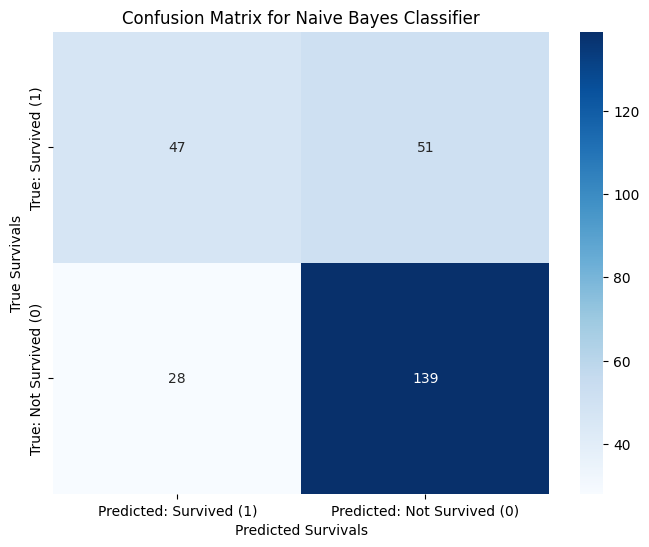

In [442]:
# Calculate TP, TN, FP, FN
tp = test_results_nb.filter((col("Survived") == 1) & (col("prediction") == 1)).count()  # True Positives
tn = test_results_nb.filter((col("Survived") == 0) & (col("prediction") == 0)).count()  # True Negatives
fp = test_results_nb.filter((col("Survived") == 0) & (col("prediction") == 1)).count()  # False Positives
fn = test_results_nb.filter((col("Survived") == 1) & (col("prediction") == 0)).count()  # False Negatives
confusion_matrix_nb = [[tp, fn],
                       [fp, tn]]

# Calculate Precision, Recall, and Accuracy
precision_nb = tp / (tp + fp) if (tp + fp) > 0 else 0  # To avoid division by zero
recall_nb = tp / (tp + fn) if (tp + fn) > 0 else 0      # To avoid division by zero
accuracy_nb = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0  # Avoid division by zero

# Print the results
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"Accuracy: {accuracy_nb:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted: Survived (1)", "Predicted: Not Survived (0)"], 
            yticklabels=["True: Survived (1)", "True: Not Survived (0)"])

plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Survivals")
plt.ylabel("True Survivals")
plt.show()

## Logistic Regression

In [443]:
# import machine learning method logistic regression for classification
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lr = LogisticRegression(featuresCol="features", labelCol="Survived")
survival_predictor_lr = lr.fit(training)

In [444]:
test_results_lr = survival_predictor_lr.transform(testing)
test_results_lr.show(truncate = False)

+------------------------------+--------+--------------------------------------------+----------------------------------------+----------+
|features                      |Survived|rawPrediction                               |probability                             |prediction|
+------------------------------+--------+--------------------------------------------+----------------------------------------+----------+
|(7,[1,2],[1.0,28.0])          |0       |[0.0112573075282012,-0.0112573075282012]    |[0.5028142971614997,0.4971857028385003] |0.0       |
|(7,[1,2],[1.0,38.0])          |0       |[0.43592146653139174,-0.43592146653139174]  |[0.6072867699215325,0.3927132300784675] |0.0       |
|(7,[1,2],[1.0,39.0])          |0       |[0.47838788243171093,-0.47838788243171093]  |[0.6173671244883161,0.3826328755116839] |0.0       |
|(7,[1,2],[2.0,28.0])          |0       |[1.0960666957799732,-1.0960666957799732]    |[0.7495223976460925,0.2504776023539075] |0.0       |
|(7,[1,2],[2.0,28.0])      

In [445]:
PredictionAndSurvived_lr = test_results_lr['Survived','prediction']
PredictionAndSurvived_lr = PredictionAndSurvived_lr.withColumn('Survived', (PredictionAndSurvived_lr['Survived']).cast('float'))
PredictionAndSurvived_lr.show()

+--------+----------+
|Survived|prediction|
+--------+----------+
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       1.0|
|     1.0|       1.0|
|     0.0|       1.0|
|     0.0|       1.0|
|     0.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
+--------+----------+
only showing top 20 rows



In [446]:
# Count the total number of correct predictions (TP + TN)
correct_predictions_lr = test_results_lr.filter(col("Survived") == col("prediction")).count()

# Count the total number of rows in the dataset
total_predictions_lr = test_results_lr.count()

# Calculate accuracy
accuracy_lr = correct_predictions_lr / total_predictions_lr
print("Accuracy of the model at predicting survival is: {:.2f}".format(accuracy_lr))

Accuracy of the model at predicting survival is: 0.79


Precision: 0.71
Recall: 0.72
Accuracy: 0.79


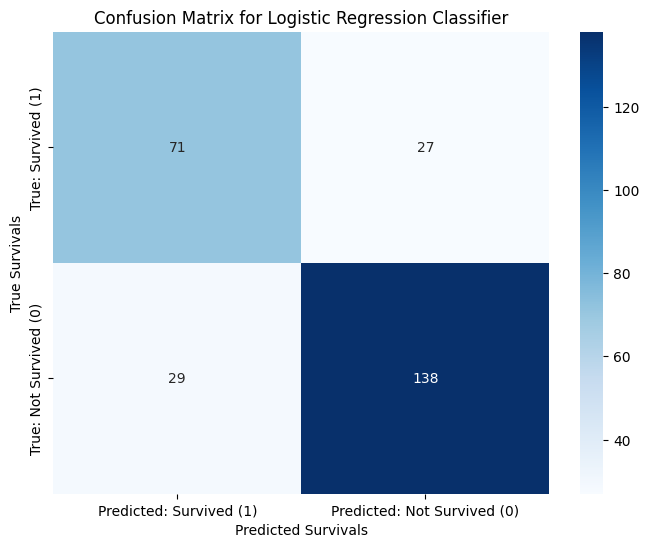

In [447]:
# Calculate TP, TN, FP, FN
#plot confusion metrics heatmap
tp = test_results_lr.filter((col("Survived") == 1) & (col("prediction") == 1)).count()  # True Positives
tn = test_results_lr.filter((col("Survived") == 0) & (col("prediction") == 0)).count()  # True Negatives
fp = test_results_lr.filter((col("Survived") == 0) & (col("prediction") == 1)).count()  # False Positives
fn = test_results_lr.filter((col("Survived") == 1) & (col("prediction") == 0)).count()  # False Negatives
confusion_matrix_lr = [[tp, fn],
                       [fp, tn]]

# Calculate Precision, Recall, and Accuracy
# Avoid division by zero
precision_lr = tp / (tp + fp) if (tp + fp) > 0 else 0  
recall_lr = tp / (tp + fn) if (tp + fn) > 0 else 0      
accuracy_lr = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0  

# Print the results
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"Accuracy: {accuracy_lr:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted: Survived (1)", "Predicted: Not Survived (0)"], 
            yticklabels=["True: Survived (1)", "True: Not Survived (0)"])

plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.xlabel("Predicted Survivals")
plt.ylabel("True Survivals")
plt.show()

## Decision Tree

In [448]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Survived')
survival_predictor_dt = dt.fit(training)
# Make predictions on the testing data
test_results_dt = survival_predictor_dt.transform(testing)
test_results_dt.show(truncate=False)

+------------------------------+--------+-------------+----------------------------------------+----------+
|features                      |Survived|rawPrediction|probability                             |prediction|
+------------------------------+--------+-------------+----------------------------------------+----------+
|(7,[1,2],[1.0,28.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2],[1.0,38.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2],[1.0,39.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2],[2.0,28.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2],[2.0,28.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2],[2.0,28.0])          |0       |[321.0,66.0] |[0.8294573643410853,0.17054263565891473]|0.0       |
|(7,[1,2,5],[1.0,28.0,25.925

In [449]:
# Initialize BinaryClassificationEvaluator
auc_eval_dt = BinaryClassificationEvaluator(labelCol="Survived", metricName="areaUnderROC")

# Evaluate the model's performance
auc_dt = auc_eval_dt.evaluate(test_results_dt)
print("AUC of the model at predicting survival is: {}".format(auc_dt))

AUC of the model at predicting survival is: 0.6899364536233654


In [450]:
PredictionAndSurvived_dt = test_results_dt['Survived','prediction']
PredictionAndSurvived_dt = PredictionAndSurvived_dt.withColumn('Survived', (PredictionAndSurvived_dt['Survived']).cast('float'))
PredictionAndSurvived_dt.show()

+--------+----------+
|Survived|prediction|
+--------+----------+
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
+--------+----------+
only showing top 20 rows



In [451]:
# Count the total number of correct predictions (TP + TN)
correct_predictions_dt = test_results_dt.filter(col("Survived") == col("prediction")).count()

# Count the total number of rows in the dataset
total_predictions_dt = test_results_dt.count()

# Calculate accuracy
accuracy_dt = correct_predictions_dt / total_predictions_dt
print("Accuracy of the model at predicting survival is: {:.2f}".format(accuracy_dt))

Accuracy of the model at predicting survival is: 0.81


Precision: 0.76
Recall: 0.69
Accuracy: 0.81


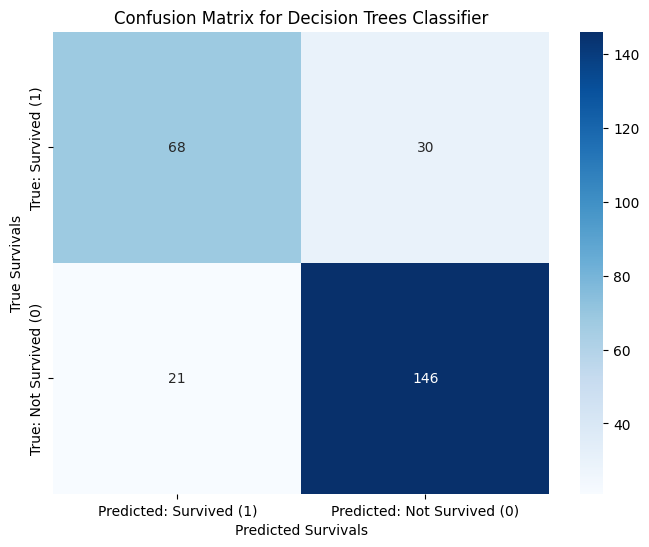

In [452]:
# Calculate TP, TN, FP, FN
#plot confusion metrics heatmap
tp = test_results_dt.filter((col("Survived") == 1) & (col("prediction") == 1)).count()  # True Positives
tn = test_results_dt.filter((col("Survived") == 0) & (col("prediction") == 0)).count()  # True Negatives
fp = test_results_dt.filter((col("Survived") == 0) & (col("prediction") == 1)).count()  # False Positives
fn = test_results_dt.filter((col("Survived") == 1) & (col("prediction") == 0)).count()  # False Negatives
confusion_matrix_dt = [[tp, fn],
                       [fp, tn]]

# Calculate Precision, Recall, and Accuracy
precision_dt = tp / (tp + fp) if (tp + fp) > 0 else 0  # To avoid division by zero
recall_dt = tp / (tp + fn) if (tp + fn) > 0 else 0      # To avoid division by zero
accuracy_dt = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0  # Avoid division by zero

# Print the results
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"Accuracy: {accuracy_dt:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted: Survived (1)", "Predicted: Not Survived (0)"], 
            yticklabels=["True: Survived (1)", "True: Not Survived (0)"])

plt.title("Confusion Matrix for Decision Trees Classifier")
plt.xlabel("Predicted Survivals")
plt.ylabel("True Survivals")
plt.show()